In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Define

In [2]:
train_img_type = 'data_0_rotate'
train_dataset_path = f'D:\\kb\\{train_img_type}'
test_dataset_path = 'D:\\kb\\test_data'

In [3]:
import os
from collections import Counter

import numpy as np
from PIL import Image
import cv2

from matplotlib import pyplot as plt

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import svm

from yellowbrick.classifier import ClassificationReport

In [4]:
# !pip freeze > requirements.txt

# Dummy generate 0-rotated

In [5]:
# from shutil import copyfile

# list_category = os.listdir(test_dataset_path)

# for cat in list_category:
#     list_target_file = [
#         file.replace('.png', '') 
#         for file in os.listdir(os.path.join(test_dataset_path, cat))
#     ]
#     os.mkdir(os.path.join(train_dataset_path, cat))
#     for target_file in list_target_file:
#         os.mkdir(os.path.join(train_dataset_path, cat, target_file))
#         copyfile(os.path.join(test_dataset_path, cat, f'{target_file}.png'), os.path.join(train_dataset_path, cat, target_file, '0_degrees.png'))

# Read data demo

In [6]:
list_category = os.listdir(test_dataset_path)

In [7]:
def compress_png(img):
    cond1 = np.logical_and((img[:,:,0]==255), (img[:,:,1]==255))
    cond2 = np.logical_and(cond1, (img[:,:,2]==255))

    target = np.zeros((img.shape[0], img.shape[1]))
    target[:,:] = np.where(cond2, 0, 1)
    
    return target

def read_img(path):
#     img = Image.open(path)
    img = cv2.imread(path)
    return compress_png(np.array(img))

In [8]:
img_path = os.path.join(test_dataset_path, list_category[0], os.listdir(os.path.join(test_dataset_path, list_category[0]))[0])
img_path

'D:\\kb\\test_data\\airplane\\1.png'

In [9]:
img = read_img(img_path)

In [10]:
Counter([item for sublist in img for item in sublist])

Counter({0.0: 63165, 1.0: 2371})

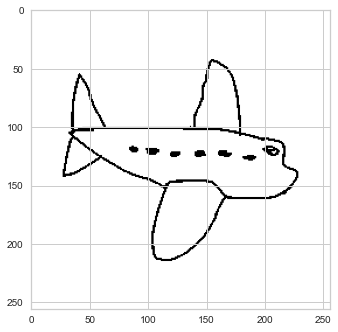

In [11]:
plt.imshow(img)

# Now split data by (category & id) for faster looping

In [12]:
item_list = []
for cat in list_category:
    list_file_by_cat = os.listdir(os.path.join(test_dataset_path, cat))
    for fn in list_file_by_cat:
        item_list.append((cat, fn.replace('.png', '')))

from sklearn.utils import shuffle
shuffled_list = shuffle(item_list, random_state=42)
shuffled_list[:10]

[('mosquito', '10651'),
 ('bookshelf', '2042'),
 ('hot-dog', '8669'),
 ('basket', '1115'),
 ('rooster', '13903'),
 ('pen', '11964'),
 ('mushroom', '11073'),
 ('cactus', '3003'),
 ('wineglass', '19772'),
 ('head', '8116')]

In [13]:
train_ratio = 0.95 # 80%
train_length = int(len(shuffled_list) * train_ratio)

Now reading data to train/test set

In [14]:
def flatten_data(img):
    return [item for sublist in img for item in sublist]

In [ ]:
train_x = []
train_y = []

for cat, fn in shuffled_list[:train_length]:
    fn_dir = os.path.join(train_dataset_path, cat, fn)
    for file in os.listdir(fn_dir):
        train_x.append(flatten_data(read_img(os.path.join(fn_dir, file))))
        train_y.append(cat)

In [ ]:
test_x = []
test_y = []

for cat, fn in shuffled_list[train_length:]:
    val_x.append(flatten_data(read_img(os.path.join(test_dataset_path, cat, f'{fn}.png'))))
    val_y.append(cat)

# Train & Report

In [ ]:
model = svm.LinearSVC()
model.fit(train_x, train_y)
y_pred = model.pred(test_x)

In [ ]:
from pycm import *

In [ ]:
cm = ConfusionMatrix(actual_vector=test_y, predict_vector=y_pred)
cm.to_html(f'{train_img_type}.html')